In [23]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import os
os.chdir("/content/drive/My Drive/HAR Dataset/HAR Mine")

In [25]:
!ls "/content/drive/My Drive/HAR Dataset/HAR Mine"

'Additional Testing Code'
'Basic Data'
 checkpoint
'data visualitaion.ipynb'
'Feature Test.ipynb'
'HAR get three activities.ipynb'
 human_activity_recognition_basic.ipynb
 human_activity_recognition_Classifier.ipynb
'Human Activity Recognition Classifier Result.gsheet'
 Human_activity_recognition_feature_extract.ipynb
 Human_activity_recognition_magnitude_Feature_extract.ipynb
 human_activity_recognition_MINE_2.ipynb
 human_activity_recognition_MINE.ipynb
 human_activity_recognition_with_raw_data.ipynb
'Processed Data'
'RNN Result.gsheet'
'Subject with number activities performed.gsheet'
 wisdomDataRemoveJoggingActivity.ipynb


In [0]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from scipy import stats
import tensorflow as tf
import seaborn as sns
from pylab import rcParams
from sklearn import metrics
from sklearn.model_selection import train_test_split

%matplotlib inline

sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 14, 8

RANDOM_SEED = 42

# Load Data

In [0]:
columns = ['x','y','z', 'timestamp_ms', 'subject_id', 'class', "timestamp_ms"]


#df = pd.read_csv('Basic Data/accelerometer_data_merged_all.csv')
#df = pd.read_csv('Basic Data/accelerometer_data_merged_three_activities.csv')

#df = pd.read_csv('Basic Data/Three_activities_data.csv')
df = pd.read_csv('Processed Data/Three_activities_data_with__50_window_size_without_overlapping.csv')

#df = pd.read_csv('WISDM_ar_v1.1_raw.txt', header = None, names = columns)
df = df.dropna()

In [29]:
df.head()

,mean_x,mean_y,mean_z,magnitude_mean,std_x,std_y,std_z,magnitude_std,rms_x,rms_y,rms_z,magnitude_rms,min_x,min_y,min_z,magnitude_min,max_x,max_y,max_z,magnitude_max,median_x,median_y,median_z,magnitude_median,mad_x,mad_y,mad_z,magnitude_mad,corr_xy,corr_yz,corr_xz,subject,class
0,-1.644151,7.299989,-4.774019,9.194468,1.374718,1.303727,1.601727,0.633384,2.143148,7.415493,5.035552,9.216258,-3.890869,4.947205,-7.264801,7.616315,1.022034,10.116287,-0.647232,10.606999,-1.443993,7.268387,-4.960381,9.253738,1.145463,1.075877,1.239351,0.493521,0.803482,0.755901,0.724554,2,SITTING
1,-4.893322,2.375117,-8.347987,10.039573,0.647945,1.077232,0.453523,0.517292,4.936034,2.607989,8.360298,10.052891,-5.834961,0.261749,-9.491409,8.587557,-2.504623,5.095642,-7.202560,11.571552,-4.917984,1.873055,-8.333808,10.034463,0.466141,0.848993,0.334032,0.331420,0.147029,0.330089,0.287061,2,SITTING
2,-4.714092,1.146173,-8.771570,10.045569,0.542208,0.410817,0.462359,0.489795,4.745172,1.217573,8.783748,10.057503,-6.402389,-0.492416,-10.326981,9.372080,-3.649048,2.102890,-7.968704,12.089280,-4.677368,1.134445,-8.762375,9.961059,0.364911,0.280063,0.326969,0.301609,0.287382,0.298514,0.050644,2,SITTING
3,-4.440626,1.069510,-8.864417,9.972461,0.071734,0.047943,0.063884,0.049366,4.441206,1.070584,8.864647,9.972584,-4.570816,0.944107,-8.995804,9.865092,-4.271545,1.226624,-8.758789,10.071942,-4.436752,1.070999,-8.861740,9.964040,0.059195,0.035829,0.051725,0.042919,0.194947,0.208995,-0.454511,2,SITTING
4,-4.375648,0.917478,-8.933562,9.991692,0.120399,0.155448,0.059223,0.069623,4.377304,0.930554,8.933758,9.991934,-4.709686,0.434143,-9.072418,9.695230,-3.852570,1.159576,-8.753998,10.174546,-4.358940,0.938118,-8.938354,10.006441,0.077469,0.110670,0.045394,0.043270,-0.026265,0.537605,-0.009120,2,SITTING


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3855 entries, 0 to 3854
Data columns (total 33 columns):
mean_x              3855 non-null float64
mean_y              3855 non-null float64
mean_z              3855 non-null float64
magnitude_mean      3855 non-null float64
std_x               3855 non-null float64
std_y               3855 non-null float64
std_z               3855 non-null float64
magnitude_std       3855 non-null float64
rms_x               3855 non-null float64
rms_y               3855 non-null float64
rms_z               3855 non-null float64
magnitude_rms       3855 non-null float64
min_x               3855 non-null float64
min_y               3855 non-null float64
min_z               3855 non-null float64
magnitude_min       3855 non-null float64
max_x               3855 non-null float64
max_y               3855 non-null float64
max_z               3855 non-null float64
magnitude_max       3855 non-null float64
median_x            3855 non-null float64
median_y   

In [32]:
#unisubs = np.unique(df['subject_id'])
unisubs = np.unique(df['subject'])
print(unisubs, type(unisubs))

[2 4 5 6 7 8] <class 'numpy.ndarray'>


In [33]:
np.unique(df['class'])

array(['SITTING', 'STANDING', 'WALKING'], dtype=object)

# Activity Bar Diagram


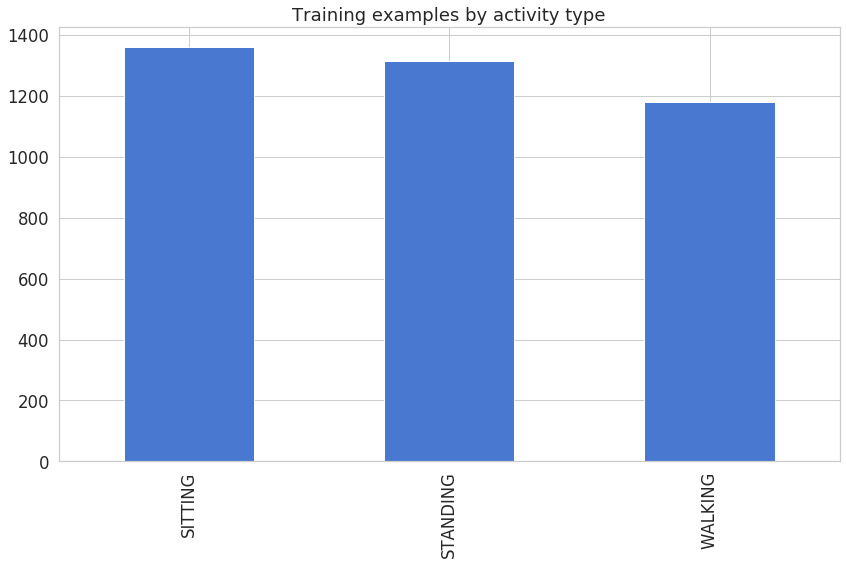

In [34]:
df['class'].value_counts().plot(kind='bar', title='Training examples by activity type');

# Each Subject Perfomin Data 

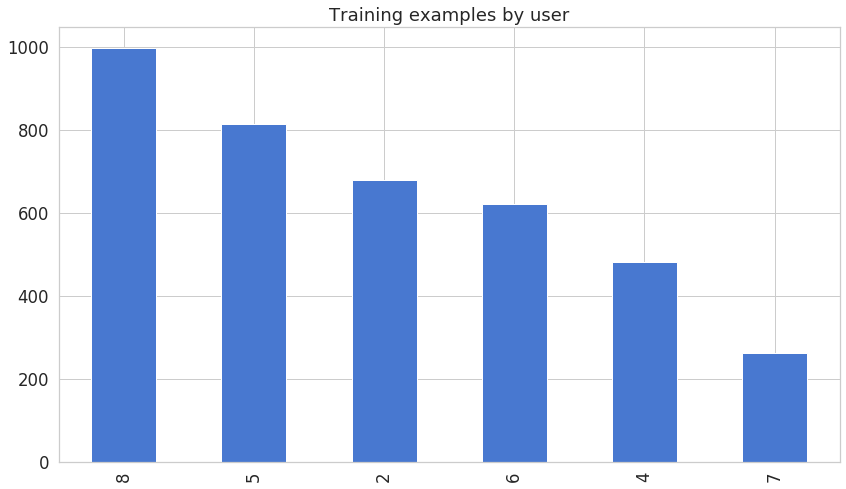

In [36]:
#df['subject_id'].value_counts().plot(kind='bar', title='Training examples by user');
df['subject'].value_counts().plot(kind='bar', title='Training examples by user');

# One Subject's One Activity 

In [0]:
def plot_activity(subject, activity, df, activity_name):
  
  #one_subject_segdata = df.loc[df['subject_id'] == subject]
  data = one_subject_segdata[one_subject_segdata['class'] == activity][['x', 'y','z']][:200]
  axis = data.plot(subplots=True, figsize=(18, 14), 
                   title= 'Subject: '+str(subject) + ' Activity: '+activity_name)
  for ax in axis:
      ax.legend(loc='lower left', bbox_to_anchor=(1.0, 0.5))

In [42]:
plot_activity(2,"SITTING", df, "Sitting")

KeyError: ignored

# One Subject All Activity

In [0]:
def plot_one_subject_all_activity(subject, df):
  #new_df = df.loc[df['subject_id'] == subject]
  new_df = df.loc[df['subject'] == subject]
  new_df['class'].value_counts().plot(kind='bar', title='Subject '+ str(subject) + " Activity Performed");
  

In [45]:
#unisubs = np.unique(df['subject_id'])
unisubs = np.unique(df['subject'])
print(unisubs, type(unisubs))

[2 4 5 6 7 8] <class 'numpy.ndarray'>


In [46]:
np.unique(df['class'])

array(['SITTING', 'STANDING', 'WALKING'], dtype=object)

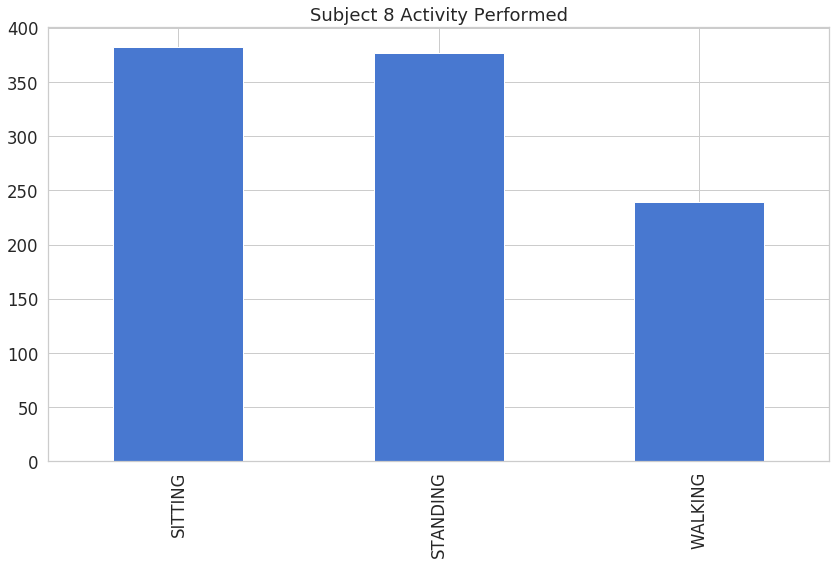

In [53]:
plot_one_subject_all_activity(8, df)